# Discrete Choice Models

## Fair's Affair data

A survey of women only was conducted in 1974 by *Redbook* asking about extramarital affairs.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import logit

In [3]:
print(sm.datasets.fair.SOURCE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



In [4]:
print(sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [5]:
dta = sm.datasets.fair.load_pandas().data

In [6]:
dta["affair"] = (dta["affairs"] > 0).astype(float)
print(dta.head(10))

   rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   
5            4.0  27.0          9.0       0.0        2.0  14.0         3.0   
6            5.0  37.0         23.0       5.5        2.0  12.0         5.0   
7            5.0  37.0         23.0       5.5        2.0  12.0         2.0   
8            3.0  22.0          2.5       0.0        2.0  12.0         3.0   
9            3.0  27.0          6.0       0.0        1.0  16.0         3.0   

   occupation_husb   affairs  affair  
0              5.0  0.111111     1.0  
1              4.0  3.230769     1.0  
2              5.0  1.40

In [7]:
print(dta.describe())

       rate_marriage          age  yrs_married     children    religious  \
count    6366.000000  6366.000000  6366.000000  6366.000000  6366.000000   
mean        4.109645    29.082862     9.009425     1.396874     2.426170   
std         0.961430     6.847882     7.280120     1.433471     0.878369   
min         1.000000    17.500000     0.500000     0.000000     1.000000   
25%         4.000000    22.000000     2.500000     0.000000     2.000000   
50%         4.000000    27.000000     6.000000     1.000000     2.000000   
75%         5.000000    32.000000    16.500000     2.000000     3.000000   
max         5.000000    42.000000    23.000000     5.500000     4.000000   

              educ   occupation  occupation_husb      affairs       affair  
count  6366.000000  6366.000000      6366.000000  6366.000000  6366.000000  
mean     14.209865     3.424128         3.850141     0.705374     0.322495  
std       2.178003     0.942399         1.346435     2.203374     0.467468  
min    

In [8]:
affair_mod = logit(
    "affair ~ occupation + educ + occupation_husb"
    "+ rate_marriage + age + yrs_married + children"
    " + religious",
    dta,
).fit()

Optimization terminated successfully.
         Current function value: 0.545314
         Iterations 6


In [9]:
print(affair_mod.summary())

                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6357
Method:                           MLE   Df Model:                            8
Date:                Fri, 29 Mar 2024   Pseudo R-squ.:                  0.1327
Time:                        17:54:09   Log-Likelihood:                -3471.5
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                5.807e-224
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.7257      0.299     12.470      0.000       3.140       4.311
occupation          0.1602      0.034      4.717      0.000       0.094       0.227
educ               -0.0392      

How well are we predicting?

In [10]:
affair_mod.pred_table()

array([[3882.,  431.],
       [1326.,  727.]])

The coefficients of the discrete choice model do not tell us much. What we're after is marginal effects.

In [11]:
mfx = affair_mod.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:                 affair
Method:                          dydx
At:                           overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
occupation          0.0293      0.006      4.744      0.000       0.017       0.041
educ               -0.0072      0.003     -2.538      0.011      -0.013      -0.002
occupation_husb     0.0023      0.004      0.541      0.589      -0.006       0.010
rate_marriage      -0.1308      0.005    -26.891      0.000      -0.140      -0.121
age                -0.0110      0.002     -5.937      0.000      -0.015      -0.007
yrs_married         0.0201      0.002     10.327      0.000       0.016       0.024
children           -0.0008      0.006     -0.134      0.893      -0.012       0.011
religious          -0.0685      0.006    -11.119      0.000      -0.081      -0.056


In [12]:
respondent1000 = dta.iloc[1000]
print(respondent1000)

rate_marriage       4.000000
age                37.000000
yrs_married        23.000000
children            3.000000
religious           3.000000
educ               12.000000
occupation          3.000000
occupation_husb     4.000000
affairs             0.521739
affair              1.000000
Name: 1000, dtype: float64


In [13]:
resp = dict(
    zip(
        range(1, 9),
        respondent1000[
            [
                "occupation",
                "educ",
                "occupation_husb",
                "rate_marriage",
                "age",
                "yrs_married",
                "children",
                "religious",
            ]
        ].tolist(),
    )
)
resp.update({0: 1})
print(resp)

{1: 3.0, 2: 12.0, 3: 4.0, 4: 4.0, 5: 37.0, 6: 23.0, 7: 3.0, 8: 3.0, 0: 1}


In [14]:
mfx = affair_mod.get_margeff(atexog=resp)
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:                 affair
Method:                          dydx
At:                           overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
occupation          0.0400      0.008      4.711      0.000       0.023       0.057
educ               -0.0098      0.004     -2.537      0.011      -0.017      -0.002
occupation_husb     0.0031      0.006      0.541      0.589      -0.008       0.014
rate_marriage      -0.1788      0.008    -22.743      0.000      -0.194      -0.163
age                -0.0151      0.003     -5.928      0.000      -0.020      -0.010
yrs_married         0.0275      0.003     10.256      0.000       0.022       0.033
children           -0.0011      0.008     -0.134      0.893      -0.017       0.014
religious          -0.0937      0.009    -10.722      0.000      -0.111      -0.077


`predict` expects a `DataFrame` since `patsy` is used to select columns.

In [15]:
respondent1000 = dta.iloc[[1000]]
affair_mod.predict(respondent1000)

1000    0.518782
dtype: float64

In [16]:
affair_mod.fittedvalues[1000]

0.07516159285057611

In [17]:
affair_mod.model.cdf(affair_mod.fittedvalues[1000])

0.5187815572121504

The "correct" model here is likely the Tobit model. We have an work in progress branch "tobit-model" on github, if anyone is interested in censored regression models.

### Exercise: Logit vs Probit

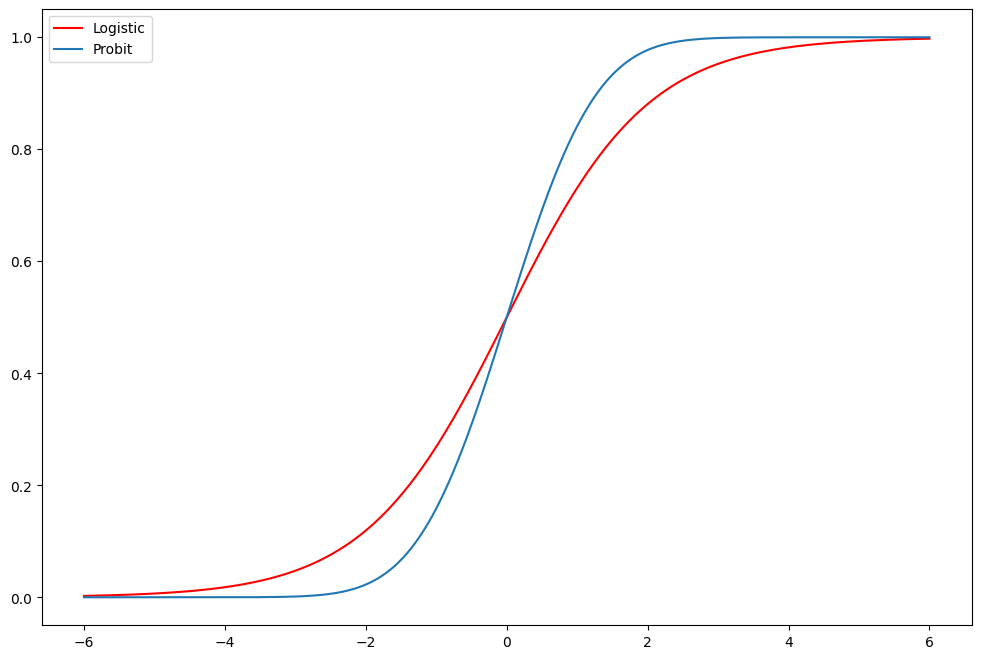

In [18]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.cdf(support), "r-", label="Logistic")
ax.plot(support, stats.norm.cdf(support), label="Probit")
ax.legend()

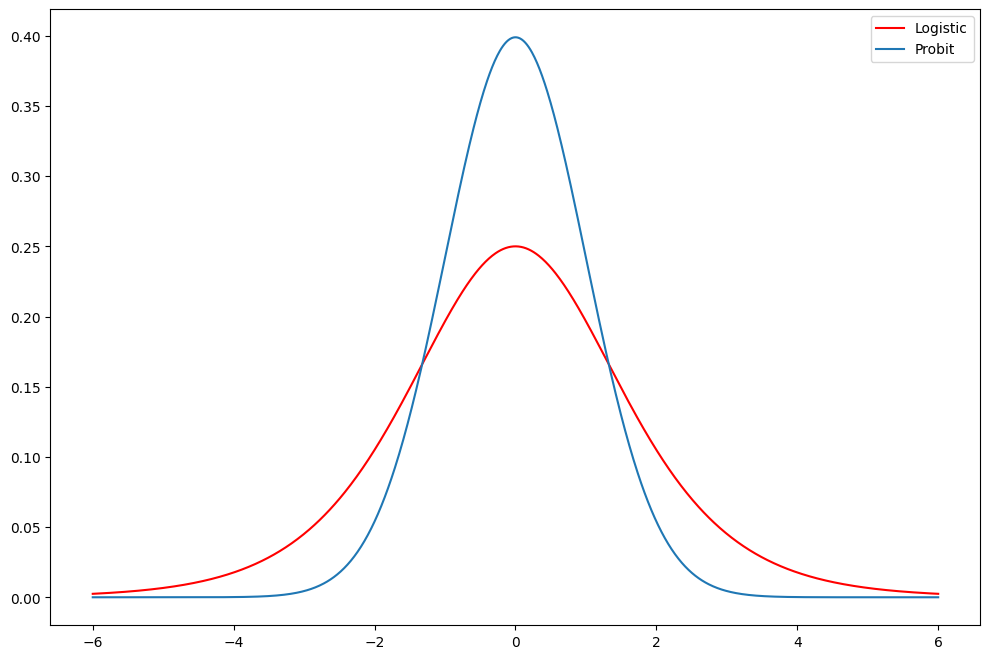

In [19]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
support = np.linspace(-6, 6, 1000)
ax.plot(support, stats.logistic.pdf(support), "r-", label="Logistic")
ax.plot(support, stats.norm.pdf(support), label="Probit")
ax.legend()

Compare the estimates of the Logit Fair model above to a Probit model. Does the prediction table look better? Much difference in marginal effects?

### Generalized Linear Model Example

In [20]:
print(sm.datasets.star98.SOURCE)


Jeff Gill's `Generalized Linear Models: A Unified Approach`

http://jgill.wustl.edu/research/books.html



In [21]:
print(sm.datasets.star98.DESCRLONG)


This data is on the California education policy and outcomes (STAR program
results for 1998.  The data measured standardized testing by the California
Department of Education that required evaluation of 2nd - 11th grade students
by the the Stanford 9 test on a variety of subjects.  This dataset is at
the level of the unified school district and consists of 303 cases.  The
binary response variable represents the number of 9th graders scoring
over the national median value on the mathematics exam.

The data used in this example is only a subset of the original source.



In [22]:
print(sm.datasets.star98.NOTE)

::

    Number of Observations - 303 (counties in California).

    Number of Variables - 13 and 8 interaction terms.

    Definition of variables names::

        NABOVE   - Total number of students above the national median for the
                   math section.
        NBELOW   - Total number of students below the national median for the
                   math section.
        LOWINC   - Percentage of low income students
        PERASIAN - Percentage of Asian student
        PERBLACK - Percentage of black students
        PERHISP  - Percentage of Hispanic students
        PERMINTE - Percentage of minority teachers
        AVYRSEXP - Sum of teachers' years in educational service divided by the
                number of teachers.
        AVSALK   - Total salary budget including benefits divided by the number
                   of full-time teachers (in thousands)
        PERSPENK - Per-pupil spending (in thousands)
        PTRATIO  - Pupil-teacher ratio.
        PCTAF    - Percenta

In [23]:
dta = sm.datasets.star98.load_pandas().data
print(dta.columns)

Index(['NABOVE', 'NBELOW', 'LOWINC', 'PERASIAN', 'PERBLACK', 'PERHISP',
       'PERMINTE', 'AVYRSEXP', 'AVSALK', 'PERSPENK', 'PTRATIO', 'PCTAF',
       'PCTCHRT', 'PCTYRRND', 'PERMINTE_AVYRSEXP', 'PERMINTE_AVSAL',
       'AVYRSEXP_AVSAL', 'PERSPEN_PTRATIO', 'PERSPEN_PCTAF', 'PTRATIO_PCTAF',
       'PERMINTE_AVYRSEXP_AVSAL', 'PERSPEN_PTRATIO_PCTAF'],
      dtype='object')


In [24]:
print(
    dta[
        ["NABOVE", "NBELOW", "LOWINC", "PERASIAN", "PERBLACK", "PERHISP", "PERMINTE"]
    ].head(10)
)

   NABOVE  NBELOW    LOWINC   PERASIAN   PERBLACK    PERHISP   PERMINTE
0   452.0   355.0  34.39730  23.299300  14.235280  11.411120  15.918370
1   144.0    40.0  17.36507  29.328380   8.234897   9.314884  13.636360
2   337.0   234.0  32.64324   9.226386  42.406310  13.543720  28.834360
3   395.0   178.0  11.90953  13.883090   3.796973  11.443110  11.111110
4     8.0    57.0  36.88889  12.187500  76.875000   7.604167  43.589740
5  1348.0   899.0  20.93149  28.023510   4.643221  13.808160  15.378490
6   477.0   887.0  53.26898   8.447858  19.374830  37.905330  25.525530
7   565.0   347.0  15.19009   3.665781   2.649680  13.092070   6.203008
8   205.0   320.0  28.21582  10.430420   6.786374  32.334300  13.461540
9   469.0   598.0  32.77897  17.178310  12.484930  28.323290  27.259890


In [25]:
print(
    dta[
        ["AVYRSEXP", "AVSALK", "PERSPENK", "PTRATIO", "PCTAF", "PCTCHRT", "PCTYRRND"]
    ].head(10)
)

   AVYRSEXP    AVSALK  PERSPENK   PTRATIO     PCTAF  PCTCHRT   PCTYRRND
0  14.70646  59.15732  4.445207  21.71025  57.03276      0.0  22.222220
1  16.08324  59.50397  5.267598  20.44278  64.62264      0.0   0.000000
2  14.59559  60.56992  5.482922  18.95419  53.94191      0.0   0.000000
3  14.38939  58.33411  4.165093  21.63539  49.06103      0.0   7.142857
4  13.90568  63.15364  4.324902  18.77984  52.38095      0.0   0.000000
5  14.97755  66.97055  3.916104  24.51914  44.91578      0.0   2.380952
6  14.67829  57.62195  4.270903  22.21278  32.28916      0.0  12.121210
7  13.66197  63.44740  4.309734  24.59026  30.45267      0.0   0.000000
8  16.41760  57.84564  4.527603  21.74138  22.64574      0.0   0.000000
9  12.51864  57.80141  4.648917  20.26010  26.07099      0.0   0.000000


In [26]:
formula = "NABOVE + NBELOW ~ LOWINC + PERASIAN + PERBLACK + PERHISP + PCTCHRT "
formula += "+ PCTYRRND + PERMINTE*AVYRSEXP*AVSALK + PERSPENK*PTRATIO*PCTAF"

#### Aside: Binomial distribution

Toss a six-sided die 5 times, what's the probability of exactly 2 fours?

In [27]:
stats.binom(5, 1.0 / 6).pmf(2)

0.16075102880658423

In [28]:
from scipy.special import comb

comb(5, 2) * (1 / 6.0) ** 2 * (5 / 6.0) ** 3

0.1607510288065844

In [29]:
from statsmodels.formula.api import glm

glm_mod = glm(formula, dta, family=sm.families.Binomial()).fit()

In [30]:
print(glm_mod.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     ['NABOVE', 'NBELOW']   No. Observations:                  303
Model:                              GLM   Df Residuals:                      282
Model Family:                  Binomial   Df Model:                           20
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -2998.6
Date:                  Fri, 29 Mar 2024   Deviance:                       4078.8
Time:                          17:54:10   Pearson chi2:                 4.05e+03
No. Iterations:                       5   Pseudo R-squ. (CS):              1.000
Covariance Type:              nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Inte

The number of trials 

In [31]:
glm_mod.model.data.orig_endog.sum(1)

0      807.0
1      184.0
2      571.0
3      573.0
4       65.0
       ...  
298    342.0
299    154.0
300    595.0
301    709.0
302    156.0
Length: 303, dtype: float64

In [32]:
glm_mod.fittedvalues * glm_mod.model.data.orig_endog.sum(1)

0      470.732584
1      138.266178
2      285.832629
3      392.702917
4       20.963146
          ...    
298    111.464708
299     61.037884
300    235.517446
301    290.952508
302     53.312851
Length: 303, dtype: float64

First differences: We hold all explanatory variables constant at their means and manipulate the percentage of low income households to assess its impact
on the response variables:

In [33]:
exog = glm_mod.model.data.orig_exog  # get the dataframe

In [34]:
means25 = exog.mean()
print(means25)

Intercept                       1.000000
LOWINC                         41.409877
PERASIAN                        5.896335
PERBLACK                        5.636808
PERHISP                        34.398080
PCTCHRT                         1.175909
PCTYRRND                       11.611905
PERMINTE                       14.694747
AVYRSEXP                       14.253875
PERMINTE:AVYRSEXP             209.018700
AVSALK                         58.640258
PERMINTE:AVSALK               879.979883
AVYRSEXP:AVSALK               839.718173
PERMINTE:AVYRSEXP:AVSALK    12585.266464
PERSPENK                        4.320310
PTRATIO                        22.464250
PERSPENK:PTRATIO               96.295756
PCTAF                          33.630593
PERSPENK:PCTAF                147.235740
PTRATIO:PCTAF                 747.445536
PERSPENK:PTRATIO:PCTAF       3243.607568
dtype: float64


In [35]:
means25["LOWINC"] = exog["LOWINC"].quantile(0.25)
print(means25)

Intercept                       1.000000
LOWINC                         26.683040
PERASIAN                        5.896335
PERBLACK                        5.636808
PERHISP                        34.398080
PCTCHRT                         1.175909
PCTYRRND                       11.611905
PERMINTE                       14.694747
AVYRSEXP                       14.253875
PERMINTE:AVYRSEXP             209.018700
AVSALK                         58.640258
PERMINTE:AVSALK               879.979883
AVYRSEXP:AVSALK               839.718173
PERMINTE:AVYRSEXP:AVSALK    12585.266464
PERSPENK                        4.320310
PTRATIO                        22.464250
PERSPENK:PTRATIO               96.295756
PCTAF                          33.630593
PERSPENK:PCTAF                147.235740
PTRATIO:PCTAF                 747.445536
PERSPENK:PTRATIO:PCTAF       3243.607568
dtype: float64


In [36]:
means75 = exog.mean()
means75["LOWINC"] = exog["LOWINC"].quantile(0.75)
print(means75)

Intercept                       1.000000
LOWINC                         55.460075
PERASIAN                        5.896335
PERBLACK                        5.636808
PERHISP                        34.398080
PCTCHRT                         1.175909
PCTYRRND                       11.611905
PERMINTE                       14.694747
AVYRSEXP                       14.253875
PERMINTE:AVYRSEXP             209.018700
AVSALK                         58.640258
PERMINTE:AVSALK               879.979883
AVYRSEXP:AVSALK               839.718173
PERMINTE:AVYRSEXP:AVSALK    12585.266464
PERSPENK                        4.320310
PTRATIO                        22.464250
PERSPENK:PTRATIO               96.295756
PCTAF                          33.630593
PERSPENK:PCTAF                147.235740
PTRATIO:PCTAF                 747.445536
PERSPENK:PTRATIO:PCTAF       3243.607568
dtype: float64


Again, `predict` expects a `DataFrame` since `patsy` is used to select columns.

In [37]:
resp25 = glm_mod.predict(pd.DataFrame(means25).T)
resp75 = glm_mod.predict(pd.DataFrame(means75).T)
diff = resp75 - resp25

The interquartile first difference for the percentage of low income households in a school district is:

In [38]:
print("%2.4f%%" % (diff[0] * 100))

-11.8863%


In [39]:
nobs = glm_mod.nobs
y = glm_mod.model.endog
yhat = glm_mod.mu

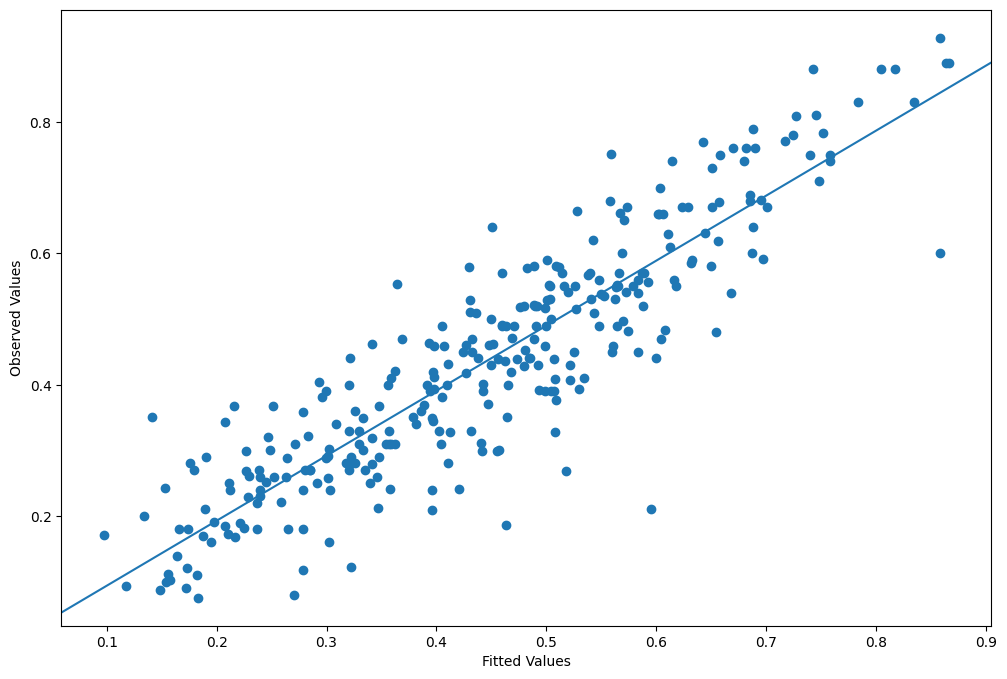

In [40]:
from statsmodels.graphics.api import abline_plot

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, ylabel="Observed Values", xlabel="Fitted Values")
ax.scatter(yhat, y)
y_vs_yhat = sm.OLS(y, sm.add_constant(yhat, prepend=True)).fit()
fig = abline_plot(model_results=y_vs_yhat, ax=ax)

#### Plot fitted values vs Pearson residuals

Pearson residuals are defined to be

$$\frac{(y - \mu)}{\sqrt{(var(\mu))}}$$

where var is typically determined by the family. E.g., binomial variance is $np(1 - p)$

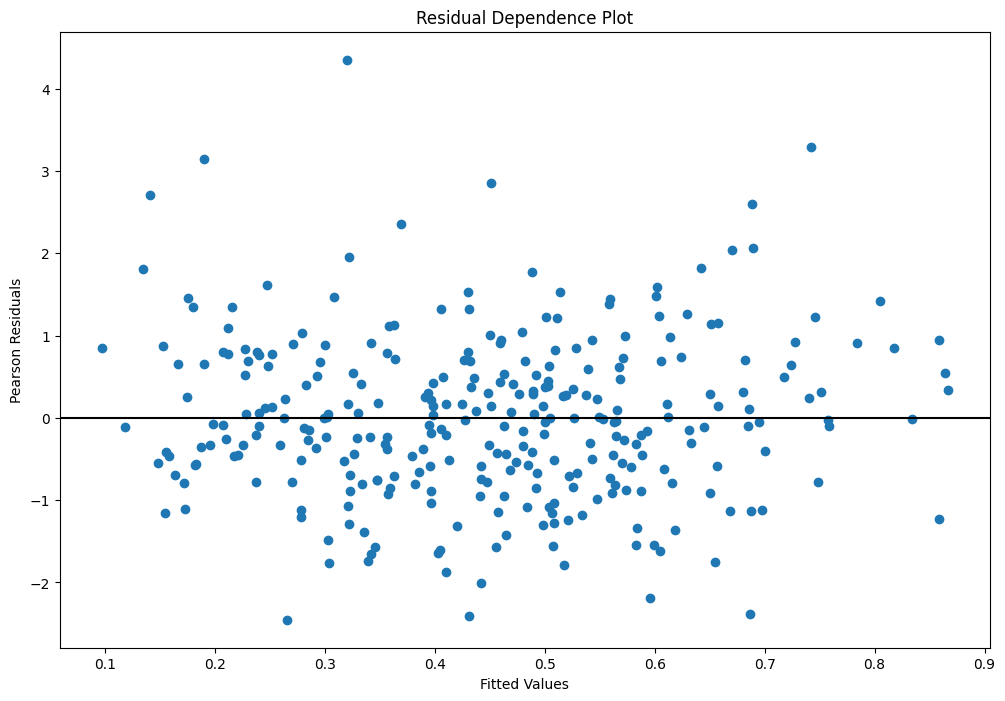

In [41]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(
    111,
    title="Residual Dependence Plot",
    xlabel="Fitted Values",
    ylabel="Pearson Residuals",
)
ax.scatter(yhat, stats.zscore(glm_mod.resid_pearson))
ax.axis("tight")
ax.plot([0.0, 1.0], [0.0, 0.0], "k-")

#### Histogram of standardized deviance residuals with Kernel Density Estimate overlaid

The definition of the deviance residuals depends on the family. For the Binomial distribution this is

$$r_{dev} = sign\left(Y-\mu\right)*\sqrt{2n(Y\log\frac{Y}{\mu}+(1-Y)\log\frac{(1-Y)}{(1-\mu)}}$$

They can be used to detect ill-fitting covariates

In [42]:
resid = glm_mod.resid_deviance
resid_std = stats.zscore(resid)
kde_resid = sm.nonparametric.KDEUnivariate(resid_std)
kde_resid.fit()

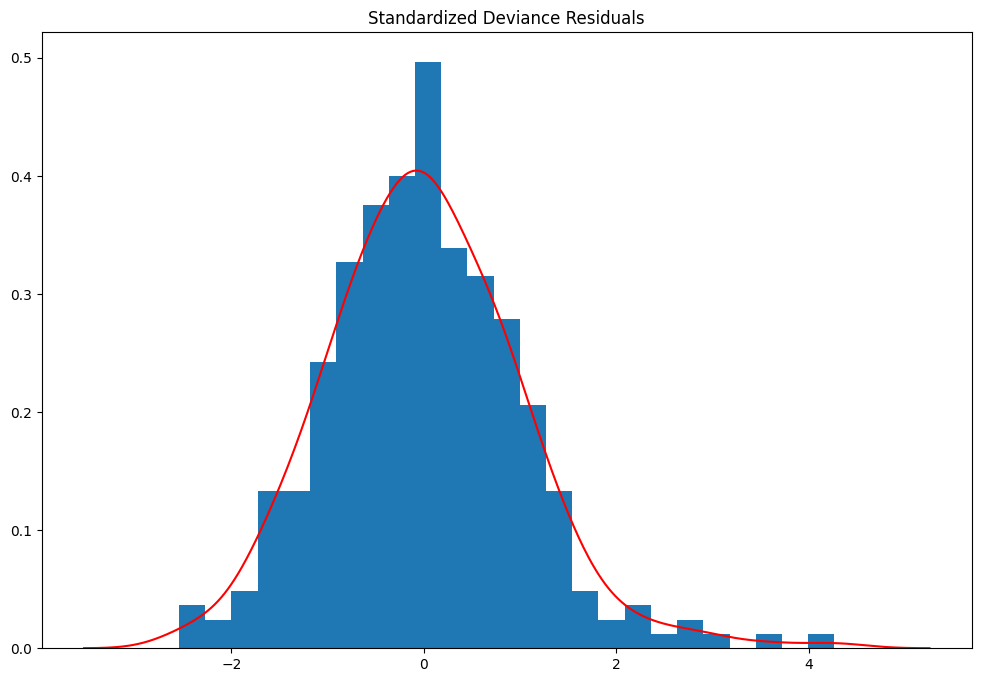

In [43]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, title="Standardized Deviance Residuals")
ax.hist(resid_std, bins=25, density=True)
ax.plot(kde_resid.support, kde_resid.density, "r")

#### QQ-plot of deviance residuals

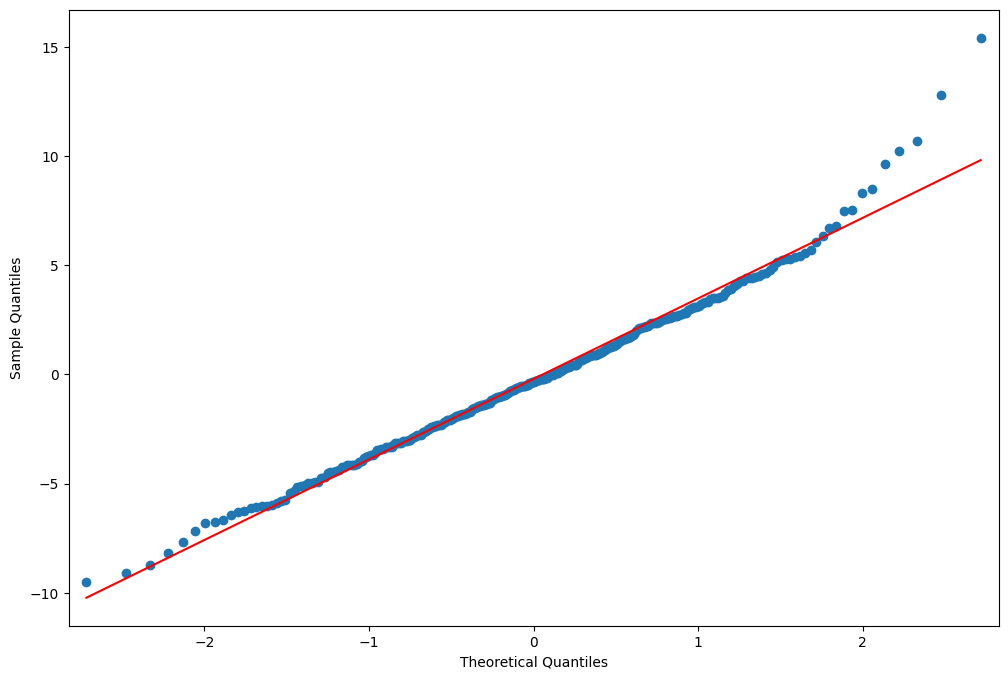

In [44]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = sm.graphics.qqplot(resid, line="r", ax=ax)